# Assignment 1, Task 1 - KMeans clustering


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

In [2]:
sns.set_style("darkgrid")
sns.set(font_scale=1.3)

## Data import and description

In [3]:
data = pd.read_csv('data.csv')
data.head()

,height,tail length,leg length,nose circumference
0,5.151,3.535,1.414,0.202
1,4.949,3.030,1.414,0.202
2,4.747,3.232,1.313,0.202
3,4.646,3.131,1.515,0.202
4,5.050,3.636,1.414,0.202


### Dataset size

In [4]:
data.count()  # values counts by column

height                300
tail length           300
leg length            300
nose circumference    300
dtype: int64

In [5]:
data.isna().sum()  # missing values count by column

height                0
tail length           0
leg length            0
nose circumference    0
dtype: int64

### Feature data types

In [6]:
data.dtypes

height                float64
tail length           float64
leg length            float64
nose circumference    float64
dtype: object

In [7]:
(data - data.round()).astype(bool).any()  # Confirm numerical type: 'True' indicates non-zero decimal expansion -> float

height                True
tail length           True
leg length            True
nose circumference    True
dtype: bool

## EDA

In [8]:
summary = data.describe()

# add range
summary = summary.append((data.max() - data.min()).rename('range'))

summary = summary.append(((data.mean() - data.median())/data.mean() * 100).rename('mean-median %'))

summary.round(3)

,height,tail length,leg length,nose circumference
count,300.000,300.000,300.000,300.000
mean,5.931,3.103,3.814,1.217
std,0.840,0.442,1.789,0.772
min,4.343,2.020,1.010,0.101
25%,5.202,2.828,1.616,0.305
50%,5.858,3.060,4.415,1.326
75%,6.528,3.366,5.202,1.836
max,8.058,4.488,7.038,2.550
range,3.715,2.468,6.028,2.449
mean-median %,1.231,1.392,-15.747,-8.928


In [9]:
z_scores = ((data - data.mean()) / data.std())
z_scores.describe()

,height,tail length,leg length,nose circumference
count,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02
mean,-2.581639e-15,1.773988e-14,1.184238e-16,-3.197442e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.891355e+00,-2.451027e+00,-1.567651e+00,-1.445249e+00
25%,-8.682499e-01,-6.227015e-01,-1.228895e+00,-1.180816e+00
50%,-8.692623e-02,-9.773694e-02,3.357539e-01,1.406983e-01
75%,7.110720e-01,5.946733e-01,7.756891e-01,8.009702e-01
max,2.533367e+00,3.133511e+00,1.802018e+00,1.725351e+00


### Visualisations 

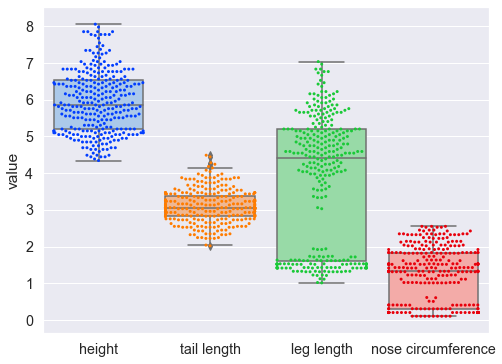

In [10]:
p1 = sns.boxplot(data=data, palette='pastel')
p1 = sns.swarmplot(data=data, palette='bright', size=3)
p1.set(ylabel='value')
p1.figure.set_size_inches((8,6))

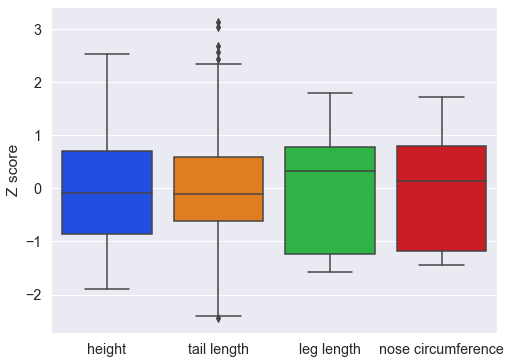

In [11]:
p2 = sns.boxplot(data=z_scores, palette='bright')
p2.set(ylabel='Z score')
p2.figure.set_size_inches((8,6))


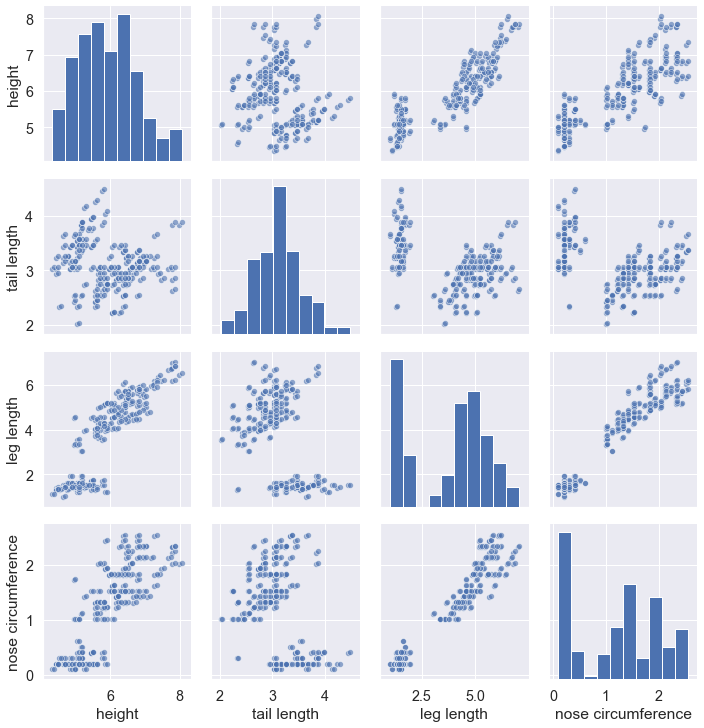

In [12]:
sns.pairplot(data=data, kind='scatter', plot_kws={'alpha': 0.6, 'lw': 0})

## Clustering

In [13]:
from sklearn.metrics import silhouette_score

In [14]:
K = 3  # number of clusters; change and re-run to see results for other number of clusters/components

In [15]:
def plot_clusters(labels):
    # display pair plot of the clustering result
    sns.pairplot(data=pd.concat((data, pd.Series(labels, name='cluster')), axis=1),
                 kind='scatter', plot_kws={'alpha': 0.6, 'lw': 0}, hue='cluster')

def assess_clusters(labels):
    # report silhouette score and display the pair plot
    print(f"Silhouette scores:")
    print(f"Euclidean:   {silhouette_score(data.values, labels):.3f}")
    print(f"Mahalanobis: {silhouette_score(data.values, labels, metric='mahalanobis'):.3f}")
    plot_clusters(labels)

### K-means clustering

In [16]:
from kmeans import KMeans

In [17]:
kmeans_model = KMeans(k=K)
kmeans_model.fit(data.values, n_attempts=10)
print(f"Fitting completed in {kmeans_model.sse_history.size} iterations.")
kmeans_model.centroids

Fitting completed in 4 iterations.


array([[6.95518182, 3.12166234, 5.81480519, 2.09336364],
       [5.98078862, 2.7857561 , 4.45673171, 1.45560163],
       [5.08109   , 3.47942   , 1.48393   , 0.24969   ]])

In [18]:
print(f"SSE: {kmeans_model.sse:g}")

SSE: 162.832


(162.75498727519087, 163.6844659861404)

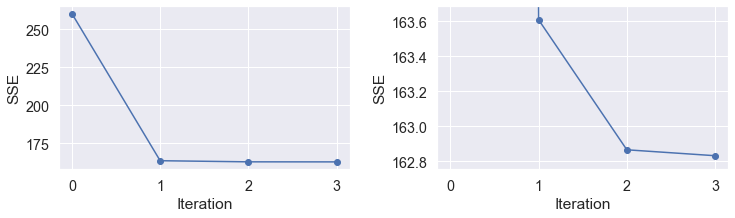

In [19]:
sh = kmeans_model.sse_history

fig, axes = plt.subplots(1, 2, figsize=(12, 3), sharex='all')
for i, ax in enumerate(axes):
    ax.plot(sh, marker='o')
    
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_xlabel("Iteration")
    ax.set_ylabel("SSE")

    fig.subplots_adjust(wspace=0.3)

span = 0.1*(sh[1] - sh[-1])

axes[1].set_ylim(sh[-1]-span, sh[1] + span)

Silhouette scores:
Euclidean:   0.556
Mahalanobis: 0.219


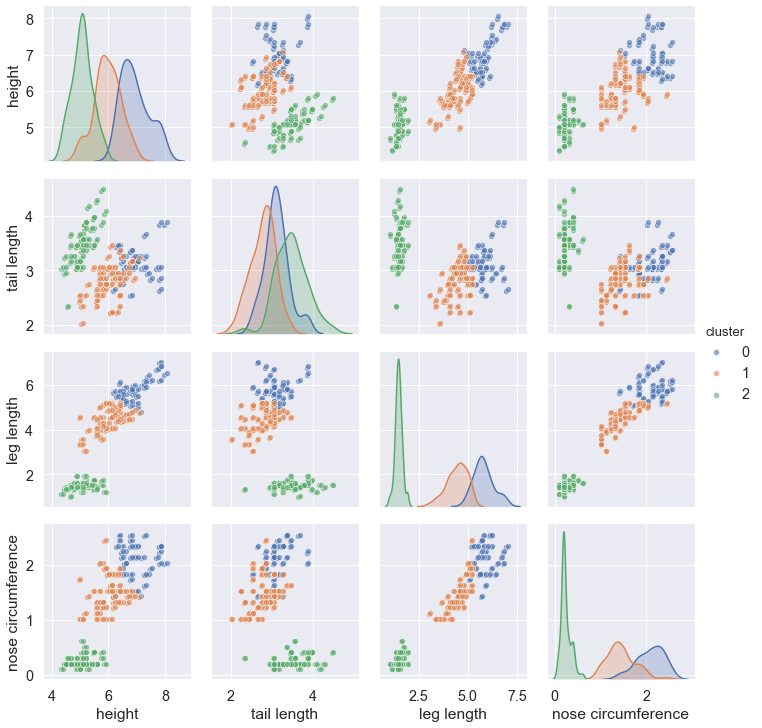

In [20]:
assess_clusters(kmeans_model.labels)

### EM clustering

In [21]:
from sklearn.mixture import GaussianMixture

In [22]:
em_model = GaussianMixture(n_components=K, n_init=10, tol=1e-6)
em_labels = em_model.fit_predict(data.values)
print(f"Fitting completed in {em_model.n_iter_} iterations")
em_model.means_

Fitting completed in 23 iterations


array([[5.08109   , 3.47942   , 1.48393   , 0.24969   ],
       [6.64277191, 2.99291981, 5.56185149, 2.01443532],
       [6.00372891, 2.81950377, 4.26465565, 1.31645788]])

In [23]:
print(f"Log-likelihood - lower bound: {em_model.lower_bound_:g}")


Log-likelihood - lower bound: -1.2629


In [24]:
print(f"Log-likelihood - average score: {em_model.score(data.values):g}")

Log-likelihood - average score: -1.2629


In [25]:
em_model.score_samples(data.values).mean()

-1.262897235012717

Silhouette scores:
Euclidean:   0.505
Mahalanobis: 0.180


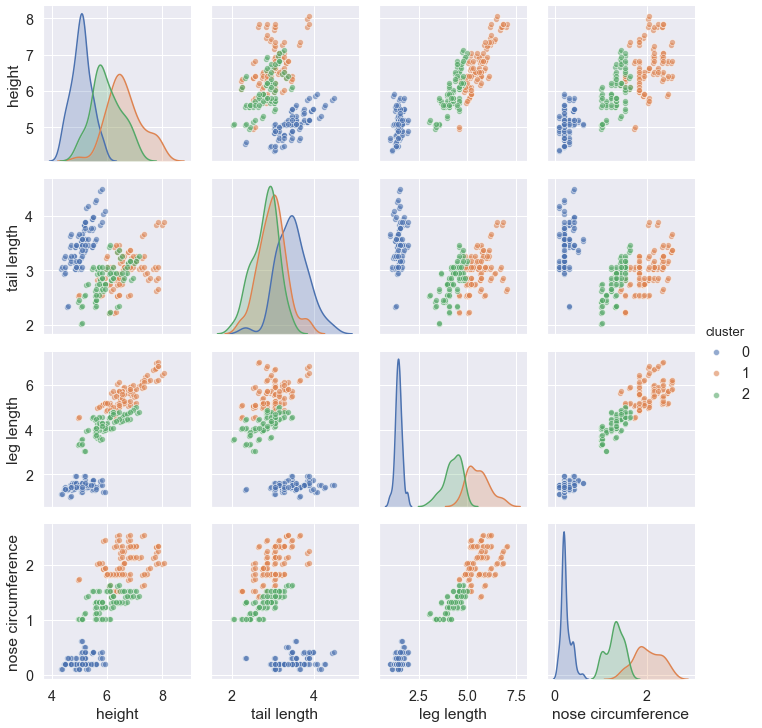

In [26]:
assess_clusters(em_labels)

### Clustering - comparison

In [27]:
def make_df(arr):
    return pd.DataFrame(arr[np.argsort(arr[:,0])], columns=data.columns)


centroids = pd.concat({'KMeans': make_df(kmeans_model.centroids), 'EM': make_df(em_model.means_)},
                      names=['method', 'cluster'])
centroids = centroids.swaplevel(0, 1).sort_index(axis=0, level=0)
centroids.round(3)

height  tail length  leg length  nose circumference
cluster method                                                     
0       EM       5.081        3.479       1.484               0.250
        KMeans   5.081        3.479       1.484               0.250
1       EM       6.004        2.820       4.265               1.316
        KMeans   5.981        2.786       4.457               1.456
2       EM       6.643        2.993       5.562               2.014
        KMeans   6.955        3.122       5.815               2.093

In [28]:
centroids['method, cluster'] = [f"{method}, {cluster}" for cluster, method in centroids.index.to_flat_index()]

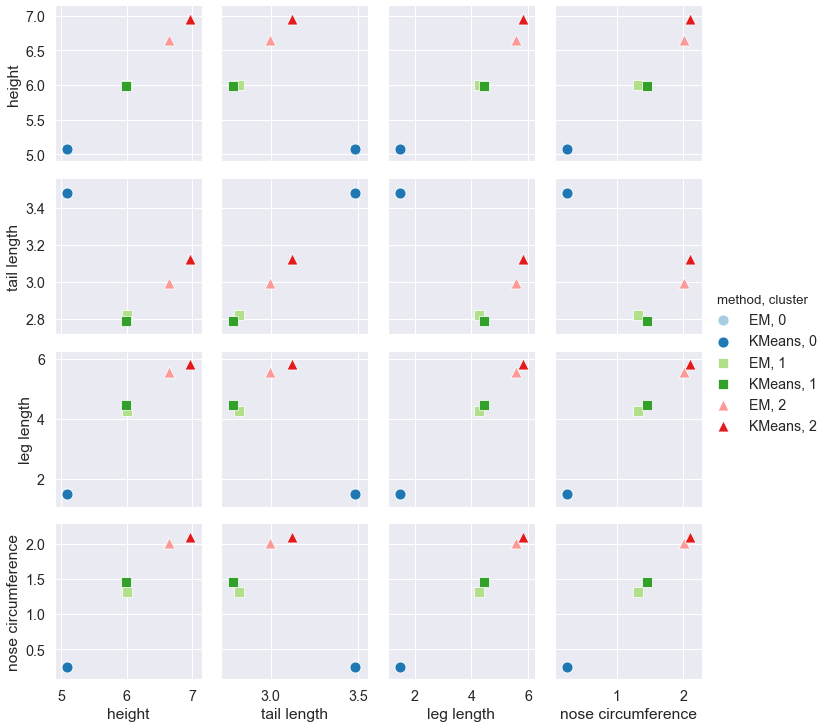

In [29]:
MARKERS_LIST = ['o', 's', '^', 'd', 'P', '*', 'X', 'v', 'H', '8', '>', '<']
markers = ((K//len(MARKERS_LIST)+1) * MARKERS_LIST)[:K]

g = sns.PairGrid(centroids, hue='method, cluster', palette='Paired', hue_kws={"marker": np.repeat(markers, 2)})
g = g.map(sns.scatterplot, s=120)
g = g.add_legend()